In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

#Задание 1 - Загрузите датасет “Титаник”

In [125]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Задание 2 - Проверьте наличие пропущенных значений и проанализируйте, в каких переменных они присутствуют.

In [104]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#Задание 3 - Проведите анализ выживаемости по полу, возрасту, классу билета и другим факторам, которые кажутся интересными.

Since 'Survived' is binary the number of survived passengers of each sex can be obtained by just applying sum() to the dataframe grouped by 'Sex' feature:

In [105]:
df.groupby('Sex')['Survived'].sum()

,Survived
Sex,
female,233
male,109


The result follows "Ladies first!" principle. To find out the percentage we can do the following:

In [106]:
(df.groupby('Sex')['Survived'].sum()) / (df.groupby('Sex')['Survived'].count()) * 100

# or

df.groupby('Sex')['Survived'].mean() * 100

,Survived
Sex,
female,74.203822
male,18.890815


Same way we can find the distribution of survived passengers by ticket class:

In [107]:
df.groupby('Pclass')['Survived'].sum()

,Survived
Pclass,
1,136
2,87
3,119


In [108]:
df.groupby('Pclass')['Survived'].mean() * 100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


One can notice that distribution by age is not obvious, since the age of the passengers has a float value and the amount of passengers with known age is really high.

In [109]:
df.groupby('Age')['Survived'].sum()

,Survived
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
...,...
70.00,0
70.50,0
71.00,0


Let us create a new column in the dataframe - ageGroup, using the pd.cut() function:

In [110]:
df['ageGroup'] = pd.cut(df['Age'], bins=[0, 7, 16, 30, 50, 81], labels=['preSchool', 'child', 'youth', 'middleAge', 'senior'])

Now the dependance becomes much more visible:

In [111]:
df.groupby('ageGroup')['Survived'].mean()

<ipython-input-111-d413945ee46a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('ageGroup')['Survived'].mean()


,Survived
ageGroup,
preSchool,0.680000
child,0.420000
youth,0.359223
middleAge,0.423237
senior,0.343750


We may also want to visualize the data. However, using more bins will make it more informative:

In [112]:
df['intAge2'] = pd.cut(df['Age'], bins=40, labels = range(0,80,2))
survivalByIntAge = df.groupby('intAge2')['Survived'].sum()
passengersByIntAge = df.groupby('intAge2')['Survived'].count()

<ipython-input-112-2fdbbd513d62>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivalByIntAge = df.groupby('intAge2')['Survived'].sum()
<ipython-input-112-2fdbbd513d62>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passengersByIntAge = df.groupby('intAge2')['Survived'].count()


<BarContainer object of 40 artists>

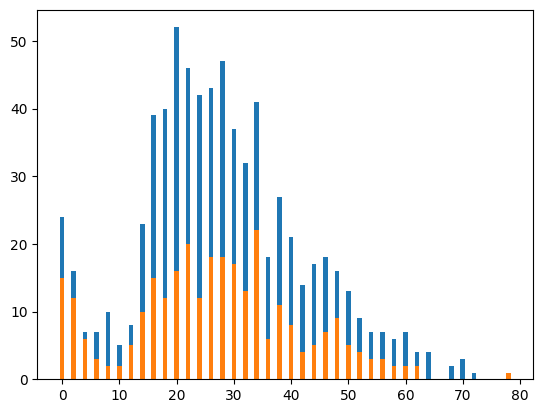

In [113]:
plt.bar(x=passengersByIntAge.index, height = passengersByIntAge.values)
plt.bar(x=survivalByIntAge.index, height = survivalByIntAge.values)

We may also want to see how having a child / children would increase your chances for survival:

In [114]:
dfWomen = df[df['Sex'] == 'female'][df['Age'] > 18]
dfWomenFirstClass = dfWomen[dfWomen['Pclass'] == 1]
dfWomenSecondClass = dfWomen[dfWomen['Pclass'] == 2]
dfWomenThirdClass = dfWomen[dfWomen['Pclass'] == 3]

<ipython-input-114-8728e2a024aa>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfWomen = df[df['Sex'] == 'female'][df['Age'] > 18]


In [115]:
womenWithChildrenSurvivalFirstClass = dfWomenFirstClass.groupby('Parch')['Survived'].count()
womenWithChildrenSurvivalSecondClass = dfWomenSecondClass.groupby('Parch')['Survived'].count()
womenWithChildrenSurvivalThirdClass = dfWomenThirdClass.groupby('Parch')['Survived'].count()

In [116]:
womenWithChildrenSurvivalFirstClassSurvived = dfWomenFirstClass.groupby('Parch')['Survived'].sum()
womenWithChildrenSurvivalSecondClassSurvived = dfWomenSecondClass.groupby('Parch')['Survived'].sum()
womenWithChildrenSurvivalThirdClassSurvived = dfWomenThirdClass.groupby('Parch')['Survived'].sum()

Text(0.5, 1.0, '3rd Class')

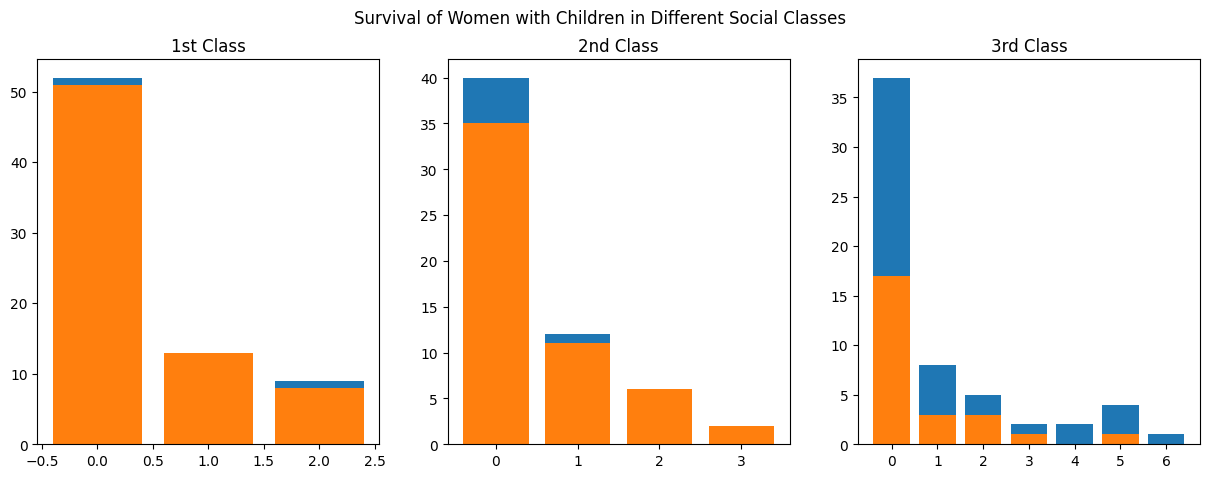

In [117]:
fig, axes = plt.subplots(1,3, figsize = (15, 5))
fig.suptitle('Survival of Women with Children in Different Social Classes')
axes[0].bar(x = womenWithChildrenSurvivalFirstClass.index, height = womenWithChildrenSurvivalFirstClass.values)
axes[0].bar(x = womenWithChildrenSurvivalFirstClassSurvived.index, height = womenWithChildrenSurvivalFirstClassSurvived.values)
axes[0].set_title('1st Class')
axes[1].bar(x = womenWithChildrenSurvivalSecondClass.index, height = womenWithChildrenSurvivalSecondClass.values)
axes[1].bar(x = womenWithChildrenSurvivalSecondClassSurvived.index, height = womenWithChildrenSurvivalSecondClassSurvived.values)
axes[1].set_title('2nd Class')
axes[2].bar(x = womenWithChildrenSurvivalThirdClass.index, height = womenWithChildrenSurvivalThirdClass.values)
axes[2].bar(x = womenWithChildrenSurvivalThirdClassSurvived.index, height = womenWithChildrenSurvivalThirdClassSurvived.values)
axes[2].set_title('3rd Class')

#Задание 4 - Разделите данные на признаки и целевую переменную, а затем на обучающую и тестовую выборки (80% на 20%):

In [126]:
dfData = df[['Sex', 'Age', 'Fare']]

dfTarget = df['Survived']

In [127]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

dfDataEncoded = encoder.fit_transform(dfData)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(dfDataEncoded, dfTarget, test_size = 0.2, random_state = 42)

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

#Задание 5 - Постройте модель дерева решений (DecisionTreeClassifier) для предсказания выживаемости пассажиров на основе признаков: пол, возраст, стоимость билета

In [130]:
titanicTree = DecisionTreeClassifier(random_state = 42)

titanicTree.fit(X_train, y_train)

y_pred = titanicTree.predict(X_test)

#Задание 6 - Оцените модель с помощью метрик: accuracy, precision, recall, F1-score. Постройте матрицу ошибок:

In [131]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.73
Precision: 0.70
Recall: 0.59
F1 Score: 0.64


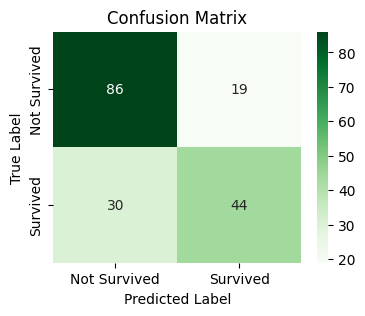

In [132]:
confusion = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()